### Возьмите задачу с винами (www.kaggle.com...ne-quality) и решите ее, оформив в виде CrispDM-подхода. Решение - jupyter notebook на github или colab.

######  1. Понимание бизнеса

###### 1.1 Цель
предсказать качество вина по шкале от 0 до 10 основываясь на его характеристиках 


###### 1.2 Описание
Два набора данных относятся к красному и белому вариантам португальского вина «Vinho Verde». Ссылка [Cortez et al., 2009]. Из-за проблем с конфиденциальностью и логистикой доступны только физико-химические (входные) и органолептические (выходные) переменные (например, нет данных о сортах винограда, марке вина, продажной цене вина и т. д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин намного больше, чем отличных или плохих). Алгоритмы обнаружения выбросов можно использовать для определения нескольких отличных или плохих вин. Кроме того, мы не уверены, что все входные переменные релевантны. Так что было бы интересно протестировать методы выбора признаков.

Два набора данных были объединены, и несколько значений были удалены случайным образом. 

###### 2. Data Understanding


In [1]:
import pandas as pd
import numpy as np

In [7]:
wines = pd.read_csv('winequalityN.csv')
wines

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
 # Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [12]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = wines.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

###### 2.4.2 Тепловая карта корреляции может дать нам понимание того, какие переменные важны

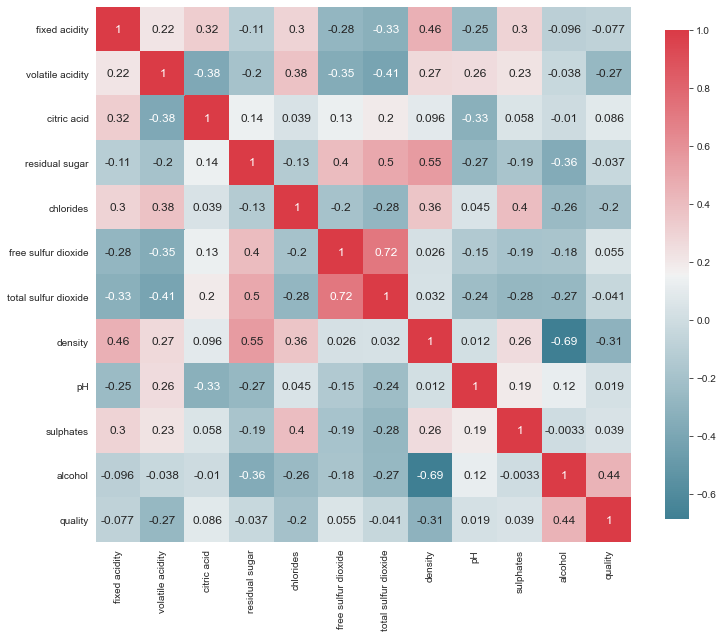

In [13]:
plot_correlation_map(wines)

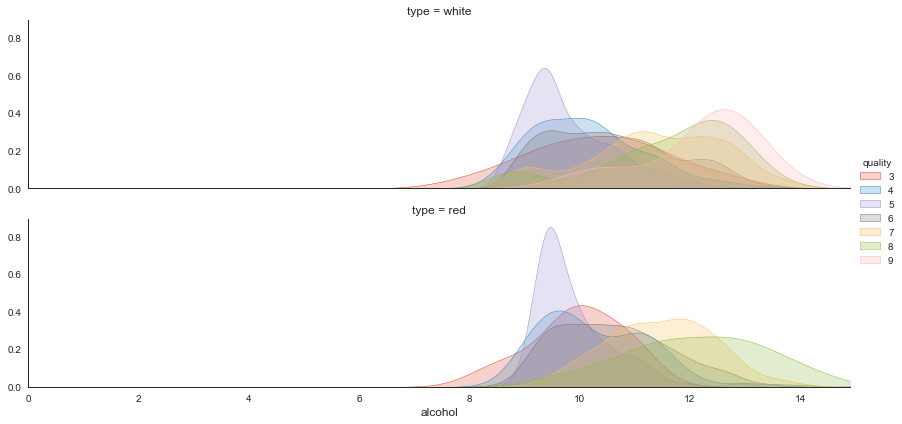

In [16]:
# Смотрим связь между количеством алкоголя и качеством в белом и красном вине
plot_distribution( wines , var = 'alcohol' , target = 'quality' , row = 'type' )

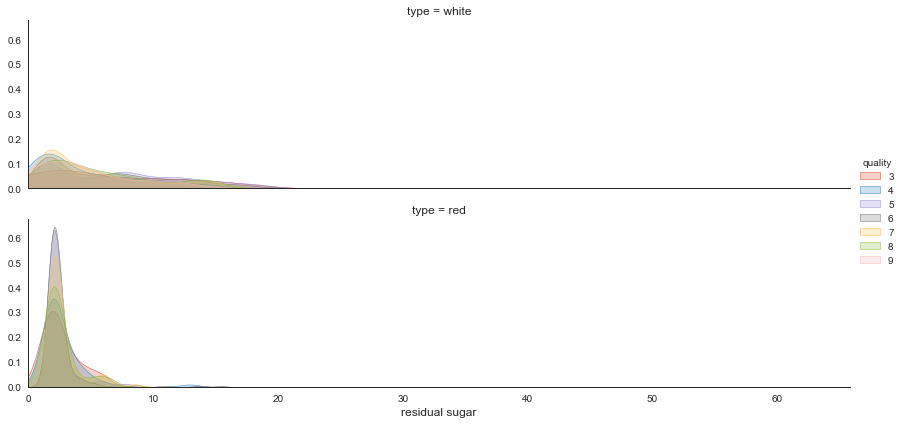

In [20]:
# Смотрим связь между количеством сахара и качеством в белом и красном вине
plot_distribution( wines , var = 'residual sugar' , target = 'quality' , row = 'type' )

###### 3. Data Preparation
переводим категориальную переменную в числовую бинарную

In [24]:
type_ = pd.Series( np.where( wines.type == 'white' , 1 , 0 ) , name = 'type' )
type_

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int32

###### 3.2 Заполнить пропущенные значения в переменных

In [26]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [29]:
# Create dataset
imputed = pd.DataFrame()

# заполняем неполные колонны средним числом
imputed[ 'fixed acidity' ] = wines['fixed acidity'].fillna( wines['fixed acidity'].mean() )
imputed[ 'volatile acidity' ] = wines['volatile acidity'].fillna( wines['volatile acidity'].mean() )
imputed[ 'citric acid' ] = wines['citric acid'].fillna( wines['citric acid'].mean() )
imputed[ 'residual sugar' ] = wines['residual sugar'].fillna( wines['residual sugar'].mean() )
imputed[ 'chlorides' ] = wines['chlorides'].fillna( wines['chlorides'].mean() )
imputed[ 'pH' ] = wines['pH'].fillna( wines['pH'].mean() )
imputed[ 'sulphates' ] = wines['sulphates'].fillna( wines['sulphates'].mean() )

In [31]:
imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     6497 non-null   float64
 1   volatile acidity  6497 non-null   float64
 2   citric acid       6497 non-null   float64
 3   residual sugar    6497 non-null   float64
 4   chlorides         6497 non-null   float64
 5   pH                6497 non-null   float64
 6   sulphates         6497 non-null   float64
dtypes: float64(7)
memory usage: 355.4 KB


In [40]:
wines2 = wines[['free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol']]
y = wines['quality']


###### 3.4 Сборка финальных датасетов для моделирования

In [37]:
full_X = pd.concat( [type_, imputed, wines2], axis=1 )
full_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int32  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   pH                    6497 non-null   float64
 7   sulphates             6497 non-null   float64
 8   free sulfur dioxide   6497 non-null   float64
 9   total sulfur dioxide  6497 non-null   float64
 10  density               6497 non-null   float64
 11  alcohol               6497 non-null   float64
dtypes: float64(11), int32(1)
memory usage: 583.8 KB


In [46]:
train_X , valid_X , train_y , valid_y = train_test_split( full_X , y , train_size = .75 )

print (full_X.shape , train_X.shape , valid_X.shape , y.shape , train_y.shape ,  valid_y.shape )

(6497, 12) (4872, 12) (1625, 12) (6497,) (4872,) (1625,)


###### 3.4.3 Важность признаков

Отбор оптимальных признаков для модели имеет важное значение. Теперь мы попытаемся оценить, какие переменные являются наиболее важными, чтобы сделать прогноз.

1.0


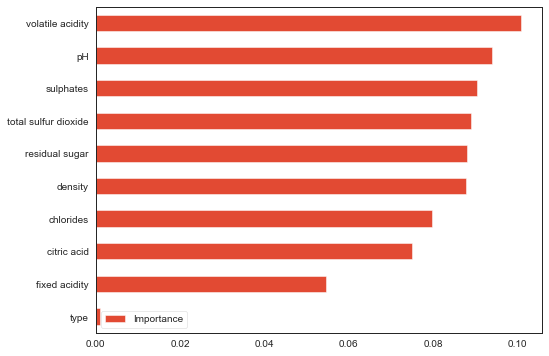

In [47]:
plot_variable_importance(train_X, train_y)

###### 4. Моделирование

In [48]:
model = LogisticRegression()

In [49]:
model.fit(train_X, train_y)

LogisticRegression()

###### 5. Оценка

In [52]:
# Score the model
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

0.4729064039408867 0.4683076923076923


In [53]:
test_Y = model.predict( full_X )
type_of_wine = full_X.type
test = pd.DataFrame( { 'type': type_of_wine , 'quality': test_Y } )
test.shape
test.head()
test.to_csv( 'type_quality.csv' , index = False )

In [59]:
type_qual = pd.read_csv('type_quality.csv')
type_qual

,type,quality
0,1,5
1,1,6
2,1,6
3,1,5
4,1,5
...,...,...
6492,0,6
6493,0,6
6494,0,6
6495,0,6


###### 6. Развертывание

In [61]:
test_Y = model.predict( full_X )
type_of_wine = full_X['volatile acidity']
test = pd.DataFrame( { 'volatile acidity': type_of_wine , 'quality': test_Y } )
test.shape
test.head()
test.to_csv( 'volatile_acidity.csv' , index = False )